# Tunnunik crater data analysis

Paleomagnetic data from the Tunnunik impact crater can be used to constrain the age of the crater through comparision to paleomagnetic data and paleogeographic models for North America.

## Import Python packages

In [21]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Tunnunik site data

In [36]:
Tunnunik_sites = pd.read_csv('../Data/Tunnunik_sites_revised.csv')
Tunnunik_sites['Dip_direction'] = Tunnunik_sites['Strike'] + 90
Tunnunik_sites_no_diabase = Tunnunik_sites[Tunnunik_sites.Unit != 'Diabase']  
Tunnunik_sites_diabase = Tunnunik_sites[Tunnunik_sites.Unit == 'Diabase']  
Tunnunik_sites_diabase

Unit Site name  site_lat  site_lon  N/n  \
2  Diabase     TUN30   72.4729 -113.9320  6/6   
3  Diabase     TUN32   72.4827 -113.9410  7/8   
4  Diabase     TUN35   72.4839 -113.9379  8/8   

  ChRM unblocking temperatures (°C)  dec_is  inc_is    k    a95  dec_tc  \
2                           465-590    98.4   -32.7  10.8  21.3    98.1   
3                           500-590   104.8   -25.9  12.8  17.5   102.1   
4                           500-590   102.3   -29.6  18.5  13.2   101.5   

   inc_tc  k .1  a95.1  Strike   Dip  NRM (A.m2.kg-1)  χ (m3.kg-1)  \
2    23.2  10.8   21.3   184.0  56.0         0.000275     0.000011   
3    42.6  12.8   17.5   207.0  70.0         0.000187     0.000009   
4    32.8  18.5   13.2   213.0  66.0         0.000272     0.000016   

   Dip_direction  
2          274.0  
3          297.0  
4          303.0

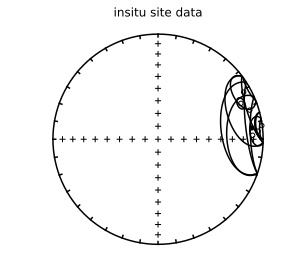

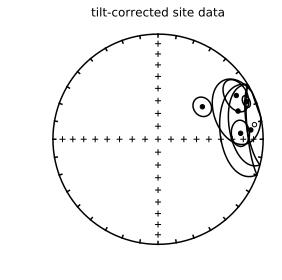

In [37]:
fignum = 1
plt.figure(num=fignum,figsize=(4,4),dpi=160)
ipmag.plot_net(fignum)
plt.title('insitu site data')

for index in Tunnunik_sites_no_diabase.index:
    ipmag.plot_di_mean(Tunnunik_sites_no_diabase.dec_is[index],
                       Tunnunik_sites_no_diabase.inc_is[index],
                       Tunnunik_sites_no_diabase.a95[index],color='k')
    
fignum = 2
plt.figure(num=fignum,figsize=(4,4),dpi=160)
ipmag.plot_net(fignum)
plt.title('tilt-corrected site data')

for index in Tunnunik_sites_no_diabase.index:
    ipmag.plot_di_mean(Tunnunik_sites_no_diabase.dec_tc[index],
                       Tunnunik_sites_no_diabase.inc_tc[index],
                       Tunnunik_sites_no_diabase.a95[index],color='k')

## Fold test on breccia + host rock directions

doing  100  iterations...please be patient.....


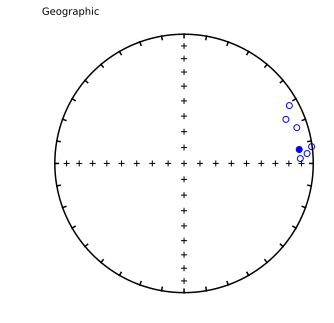

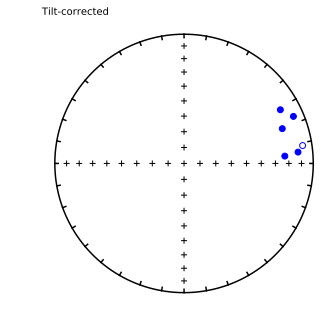

LinAlgError: Array must not contain infs or NaNs

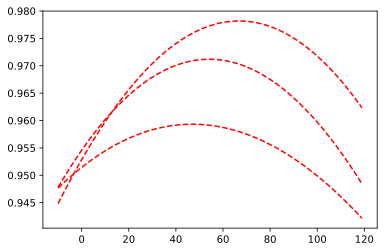

In [38]:
dec = Tunnunik_sites_no_diabase.dec_is.tolist()
inc = Tunnunik_sites_no_diabase.inc_is.tolist()
dip_direction = Tunnunik_sites_no_diabase.Dip_direction.tolist()
dip = Tunnunik_sites_no_diabase.Dip.tolist()
fold_test_array = ipmag.make_diddd_array(dec, inc, dip_direction, dip)
ipmag.bootstrap_fold_test(fold_test_array,num_sims=100)

doing  100  iterations...please be patient.....


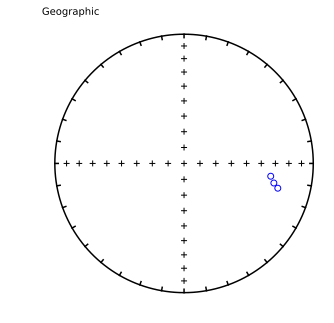

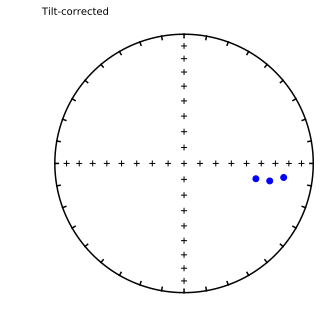

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



tightest grouping of vectors obtained at (95% confidence bounds):
-10 - 22 percent unfolding
range of all bootstrap samples: 
-10  -  26 percent unfolding


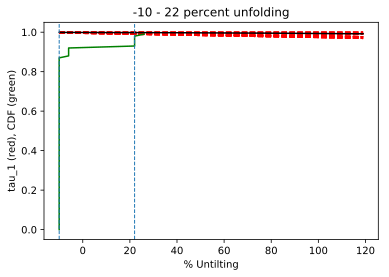

In [39]:
dec = Tunnunik_sites_diabase.dec_is.tolist()
inc = Tunnunik_sites_diabase.inc_is.tolist()
dip_direction = Tunnunik_sites_diabase.Dip_direction.tolist()
dip = Tunnunik_sites_diabase.Dip.tolist()
fold_test_array = ipmag.make_diddd_array(dec, inc, dip_direction, dip)
ipmag.bootstrap_fold_test(fold_test_array,num_sims=100)

## Tunnunik pole

To develop an impact virtual geomagnetic pole we will use the directions from the breccia dikes and the sedimentary units. As can be seen in the plots below, the direction from the dikes which is isolated at relatively high temperatures (likely above temperatures that resulted due to impact-related heating) is close to other directions developed from the Franklin large igneous provinces.

In [40]:
ipmag.vgp_calc(Tunnunik_sites_no_diabase, tilt_correction='no')
ipmag.vgp_calc(Tunnunik_sites_diabase, tilt_correction='no')

Unit Site name  site_lat  site_lon  N/n  \
2  Diabase     TUN30   72.4729 -113.9320  6/6   
3  Diabase     TUN32   72.4827 -113.9410  7/8   
4  Diabase     TUN35   72.4839 -113.9379  8/8   

  ChRM unblocking temperatures (°C)  dec_is  inc_is    k    a95     ...       \
2                           465-590    98.4   -32.7  10.8  21.3     ...        
3                           500-590   104.8   -25.9  12.8  17.5     ...        
4                           500-590   102.3   -29.6  18.5  13.2     ...        

   Strike   Dip  NRM (A.m2.kg-1)  χ (m3.kg-1)  Dip_direction  paleolatitude  \
2   184.0  56.0         0.000275     0.000011          274.0     -17.796334   
3   207.0  70.0         0.000187     0.000009          297.0     -13.646622   
4   213.0  66.0         0.000272     0.000016          303.0     -15.856642   

     vgp_lat     vgp_lon  vgp_lat_rev  vgp_lon_rev  
2 -19.471257  333.600438    19.471257   153.600438  
3 -17.440113  326.056394    17.440113   146.056394  
4 -18.798390  329.195119    18.798390   149.195119  

[3 rows x 24 columns]

In [41]:
impact_vgp_lon = Tunnunik_sites_no_diabase.vgp_lon.tolist()
impact_vgp_lat = Tunnunik_sites_no_diabase.vgp_lat.tolist()
impact_mean_pole = ipmag.fisher_mean(impact_vgp_lon,impact_vgp_lat)
ipmag.print_pole_mean(impact_mean_pole)

Plon: 349.3  Plat: 1.3
Number of directions in mean (n): 7
Angular radius of 95% confidence (A_95): 8.3
Precision parameter (k) estimate: 53.7


In [42]:
Tunnunik_breccia = Tunnunik_sites_no_diabase[Tunnunik_sites_no_diabase.Unit == 'Breccia']
Tunnunik_Victoria = Tunnunik_sites_no_diabase[Tunnunik_sites_no_diabase.Unit == 'Victoria']
Tunnunik_Shaler = Tunnunik_sites_no_diabase[Tunnunik_sites_no_diabase.Unit == 'Shaler']

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


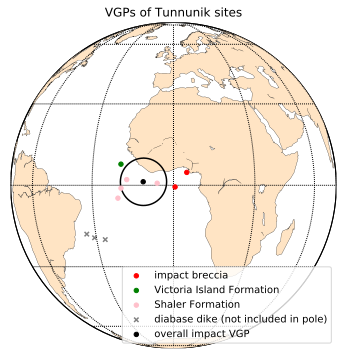

In [43]:
from mpl_toolkits.basemap import Basemap
mapname = Basemap(projection='ortho',lat_0=0,lon_0=0)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_breccia.vgp_lon.tolist(),
               vgp_lat=Tunnunik_breccia.vgp_lat.tolist(),
               color='red',label='impact breccia')
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_Victoria.vgp_lon.tolist(),
               vgp_lat=Tunnunik_Victoria.vgp_lat.tolist(),
               color='green',label='Victoria Island Formation')
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_Shaler.vgp_lon.tolist(),
               vgp_lat=Tunnunik_Shaler.vgp_lat.tolist(),
               color='pink',label='Shaler Formation')
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_sites_diabase.vgp_lon.tolist(),
               vgp_lat=Tunnunik_sites_diabase.vgp_lat.tolist(),
               color='grey',label='diabase dike (not included in pole)',marker='x')
ipmag.plot_pole(mapname,impact_mean_pole['dec'],impact_mean_pole['inc'],impact_mean_pole['alpha95'],label='overall impact VGP')
plt.title('VGPs of Tunnunik sites')
plt.legend(loc=4,fontsize=10)
plt.savefig('Tunnunik_VGP.png')
plt.show()

In [44]:
ipmag.vgp_calc(Tunnunik_sites_diabase)

Unit Site name  site_lat  site_lon  N/n  \
2  Diabase     TUN30   72.4729 -113.9320  6/6   
3  Diabase     TUN32   72.4827 -113.9410  7/8   
4  Diabase     TUN35   72.4839 -113.9379  8/8   

  ChRM unblocking temperatures (°C)  dec_is  inc_is    k    a95     ...       \
2                           465-590    98.4   -32.7  10.8  21.3     ...        
3                           500-590   104.8   -25.9  12.8  17.5     ...        
4                           500-590   102.3   -29.6  18.5  13.2     ...        

   Strike   Dip  NRM (A.m2.kg-1)  χ (m3.kg-1)  Dip_direction  paleolatitude  \
2   184.0  56.0         0.000275     0.000011          274.0      12.095555   
3   207.0  70.0         0.000187     0.000009          297.0      24.691722   
4   213.0  66.0         0.000272     0.000016          303.0      17.860395   

     vgp_lat     vgp_lon  vgp_lat_rev  vgp_lon_rev  
2   9.109586  324.708377    -9.109586   144.708377  
3  19.940167  316.974756   -19.940167   136.974756  
4  13.613150  319.732163   -13.613150   139.732163  

[3 rows x 24 columns]

In [49]:
dike_mean = ipmag.fisher_mean(Tunnunik_sites_diabase.vgp_lon_rev.tolist(),
                              Tunnunik_sites_diabase.vgp_lat_rev.tolist())
ipmag.print_pole_mean(dike_mean)

Plon: 140.5  Plat: -14.2
Number of directions in mean (n): 3
Angular radius of 95% confidence (A_95): 10.1
Precision parameter (k) estimate: 149.3


In the plot below, the Natkusiak upper lavas (Victoria Island) pole is from Palmer et al., 1983. The Victoria I.–Baffin lavas and intrusions pole is a mean calculated in Denyszyn et al., 2009.

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


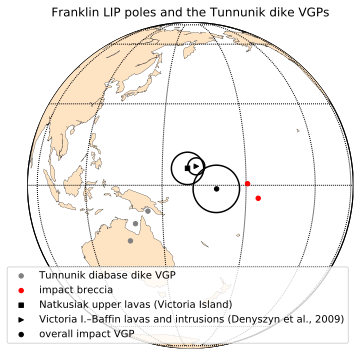

In [55]:
from mpl_toolkits.basemap import Basemap
mapname = Basemap(projection='ortho',lat_0=0,lon_0=160)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_sites_diabase.vgp_lon_rev.tolist(),
               vgp_lat=Tunnunik_sites_diabase.vgp_lat_rev.tolist(),
               color='grey',label='Tunnunik diabase dike VGP')
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_breccia.vgp_lon_rev.tolist(),
               vgp_lat=Tunnunik_breccia.vgp_lat_rev.tolist(),
               color='red',label='impact breccia')
# ipmag.plot_pole(mapname,plon=162.1,plat=6.7,A95=3.0)
ipmag.plot_pole(mapname,plon=159,plat=6,A95=5.7,
                marker='s', label='Natkusiak upper lavas (Victoria Island)')
# ipmag.plot_pole(mapname,plon=153.3,plat=9.2,A95=3.0,
#                 marker='p',label='Northwest Baffin dikes')
# ipmag.plot_pole(mapname,plon=163,plat=-7,A95=4,
#                 marker='d',label='Natkusiak lavas and sills  (Victoria Island)')
# ipmag.plot_pole(mapname,plon=163,plat=-1,A95=9,
#                 marker='^',label='Coronation sills')
ipmag.plot_pole(mapname,plon=162.1,plat=6.7,A95=3,
                marker='>',label='Victoria I.–Baffin lavas and intrusions (Denyszyn et al., 2009)')
ipmag.plot_pole(mapname,impact_mean_pole['dec']+180,-impact_mean_pole['inc'],impact_mean_pole['alpha95'],label='overall impact VGP')
plt.legend(loc=4,fontsize=10)
plt.title('Franklin LIP poles and the Tunnunik dike VGPs')
plt.savefig('Franklin_LIP.png')
plt.show()

## Impact pole vs. Torsvik et al. (2012) running mean APWP

In [56]:
Laurentia_Pole_Compilation = pd.read_csv('../Data/Laurentia_Pole_Compilation.csv')
Laurentia_APWP_T2012 = pd.read_csv('../Data/Laurentia_Mean_APWP.csv')
Laurentia_APWP_T2012

Age     N  A95_RM  Plat_RM  Plon_RM  A95_RM_f  Plat_RM_f  Plon_RM_f  \
0     0  15.0     2.2    -87.5    295.4       2.3      -88.0      322.8   
1    10  16.0     2.2    -87.4    283.7       2.4      -88.4      334.3   
2    20  11.0     3.7    -84.0    325.4       3.6      -84.1      338.1   
3    30  14.0     3.1    -82.8    341.9       3.1      -82.8      341.9   
4    40  15.0     2.8    -81.7    338.1       3.2      -81.8      344.8   
5    50  20.0     4.0    -76.0    349.6       4.2      -75.7      358.4   
6    60  21.0     3.8    -74.2    355.6       3.9      -73.8        5.0   
7    70  14.0     4.6    -75.3      7.5       4.9      -75.0       18.0   
8    80   7.0     7.0    -74.4     14.6       7.9      -74.5       21.3   
9    90   4.0     6.3    -74.7     18.6       6.3      -74.7       18.6   
10  100   3.0    13.1    -75.6      0.7      13.1      -75.6        0.7   
11  110   7.0     4.7    -75.4     10.0       4.7      -75.4       10.0   
12  120  10.0     3.2    -72.5     16.6       3.2      -72.5       16.6   
13  130   7.0     4.0    -71.3     18.2       4.0      -71.3       18.2   
14  140   3.0    18.3    -63.3    357.1       7.1      -62.6       18.2   
15  150   5.0    12.5    -62.4    341.4      12.9      -64.1      359.8   
16  160   7.0     9.2    -62.7    319.3      10.6      -66.8      337.9   
17  170   6.0    10.6    -63.3    305.4      12.4      -67.0      316.1   
18  180   8.0     6.8    -65.9    275.3       6.0      -67.8      277.2   
19  190  16.0     3.5    -65.2    264.6       3.2      -66.5      264.9   
20  200  19.0     2.8    -63.5    262.8       2.6      -64.2      262.8   
21  210  27.0     2.3    -59.8    269.7       2.1      -61.3      270.0   
22  220  28.0     2.5    -56.0    278.2       2.5      -58.0      279.2   
23  230  19.0     3.3    -52.1    288.0       3.5      -54.5      290.1   
24  240  13.0     4.4    -50.2    292.4       4.7      -53.2      295.3   
25  250   4.0    12.5    -50.8    293.2      13.6      -53.1      294.8   
26  260   5.0     3.5    -52.8    302.7       3.5      -54.9      305.4   
27  270   7.0     4.2    -51.7    303.3       4.9      -53.1      305.3   
28  280  10.0     4.8    -47.4    303.4       5.2      -48.5      304.8   
29  290  13.0     3.9    -43.1    302.0       4.6      -44.4      303.6   
30  300  13.0     4.4    -42.4    302.2       5.5      -43.6      304.0   
31  310   8.0     7.0    -36.4    302.1       8.0      -36.4      302.9   
32  320   5.0     9.4    -26.9    301.6       8.2      -25.7      301.5   
33  330   5.0     8.8    -23.3    304.6       8.7      -21.5      304.4   
34  340   3.0    11.0    -21.8    310.3       8.5      -18.7      309.9   
35  350   NaN     0.1    -23.2    308.5       NaN      -18.1      306.5   
36  360   NaN     0.1    -24.6    306.8       NaN      -17.4      303.0   
37  370   1.0    16.0    -27.4    303.0      16.0      -16.6      299.6   
38  380   NaN     0.1    -19.5    297.9       NaN      -12.2      296.0   
39  390   NaN     0.1    -11.4    293.3       NaN       -7.8      292.4   
40  400   1.0    11.0     -3.3    289.0      11.0       -3.3      289.0   
41  410   3.0    19.2    -11.2    292.9      21.9       -6.3      292.7   
42  420   3.0    19.3    -16.6    299.4      26.2      -11.7      299.2   
43  430   3.0    17.5    -20.3    313.1      13.0      -17.8      311.7   
44  440   1.0     7.3    -24.0    326.6       7.3      -16.9      321.7   
45  450   NaN     0.1    -21.1    328.1       NaN      -16.5      324.8   
46  460   NaN     0.1    -18.3    329.5       NaN      -16.0      327.8   
47  470   2.0    11.1    -15.4    330.8      11.1      -15.4      330.8   
48  480   3.0    14.7    -13.8    336.1      14.7      -13.8      336.1   
49  490   7.0     7.9     -7.5    342.7       8.3       -6.8      341.5   
50  500   8.0     6.2     -3.8    344.5       6.6       -3.3      343.6   
51  510   4.0    12.9     -1.1    345.6      12.7       -1.4      346.0   
52  520   NaN     0.1      5.

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


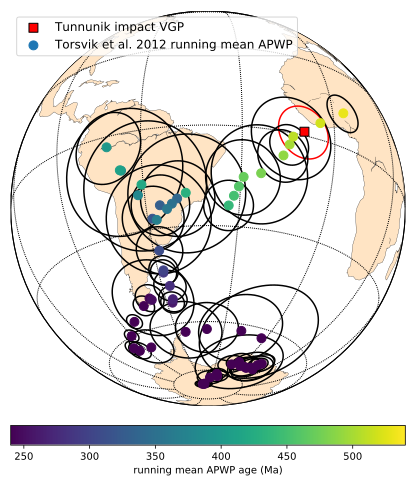

In [57]:
plt.figure(figsize=(8, 8))
pmap = Basemap(projection='ortho',lat_0=-25,lon_0=320,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

ipmag.plot_pole(pmap,impact_mean_pole['dec'],
               impact_mean_pole['inc'],
               impact_mean_pole['alpha95'],
               label='Tunnunik impact VGP',
               marker='s',color='Red',
               markersize=80)

for n in range(0, len(Laurentia_APWP_T2012)):
     m = ipmag.plot_pole_colorbar(pmap, Laurentia_APWP_T2012['Plon_RM'][n],
                                  Laurentia_APWP_T2012['Plat_RM'][n],
                                  Laurentia_APWP_T2012['A95_RM'][n],
                                  Laurentia_APWP_T2012['Age'][n],
                                  240,
                                  540,
                                  markersize=80, color="k", alpha=1)

n = 0

m = ipmag.plot_pole_colorbar(pmap, Laurentia_APWP_T2012['Plon_RM'][n],
                          Laurentia_APWP_T2012['Plat_RM'][n],
                          Laurentia_APWP_T2012['A95_RM'][n],
                          Laurentia_APWP_T2012['Age'][n],
                          240,
                          540,
                          markersize=80, color="k", alpha=1,label='Torsvik et al. 2012 running mean APWP')

pmap.colorbar(m,location='bottom',pad="5%",label='running mean APWP age (Ma)')
plt.legend(fontsize=12,loc=2)
plt.savefig('Tunnunik_APWP_comparison.pdf')
plt.show()

## Paleogeography and secular variation analysis

GPlates was used to calculate the position of the Tunnunik pole through time predicted by the Torsvik and Cocks (2017) paleogeographic model and the Swanson-Hysell and Macdonald (2017) modification of it. The angle of this position relative to the geographic pole can be calculated.

In [62]:
Tunnunik_pole_SH2017 = pd.read_csv('../Data/Tunnunik_pole_SH2017.csv')
Tunnunik_pole_TC2017 = pd.read_csv('../Data/Tunnunik_pole_TC2017.csv')

In [63]:
time_SH2017 = []
angle_SH2017 = []

for n in range(0,len(Tunnunik_pole_SH2017)):
    time_SH2017.append(-Tunnunik_pole_SH2017['Time (Ma)'][n])
    pole_recon = (Tunnunik_pole_SH2017['Lon'][n],Tunnunik_pole_SH2017['Lat'][n])
    angle = pmag.angle(pole_recon,(0,-90))
    angle_SH2017.append(angle[0])
    
angular_distance_SH2017 = pd.DataFrame({'time': time_SH2017,'angle':angle_SH2017})
angular_distance_SH2017

angle  time
0    8.9147  -530
1    7.7882  -520
2    1.8664  -510
3    6.0536  -500
4   17.4953  -490
5   29.3567  -480
6   34.0156  -470
7   35.6202  -460
8   35.7028  -450
9   35.6564  -440
10  36.2400  -430
11  44.2705  -420
12  56.4602  -410
13  60.5017  -400
14  59.6432  -390
15  56.0955  -380
16  52.7069  -370
17  49.6694  -360
18  47.7898  -350
19  48.6504  -340
20  51.5696  -330
21  43.5617  -320
22  49.1499  -310
23  52.0825  -300
24  53.2976  -290
25  54.0944  -280
26  60.5644  -270
27  66.3107  -260
28  66.8198  -250
29  70.3435  -240
30  75.2329  -230
31  80.5541  -220
32  86.6104  -210
33  90.9372  -200
34  88.9965  -190
35  83.2032  -180
36  74.9383  -170
37  74.7909  -160
38  74.1747  -150
39  70.1610  -140
40  72.9538  -130
41  76.7286  -120
42  78.8695  -110
43  80.0901  -100
44  78.5435   -90
45  77.0854   -80
46  76.1857   -70
47  75.7736   -60
48  77.7712   -50
49  81.6691   -40
50  83.5748   -30
51  85.0022   -20
52  87.6874   -10
53  91.3000     0

In [64]:
time_TC2017 = []
angle_TC2017 = []

for n in range(0,len(Tunnunik_pole_TC2017)):
    time_TC2017.append(-Tunnunik_pole_TC2017['Time (Ma)'][n])
    pole_recon = (Tunnunik_pole_TC2017['Lon'][n],Tunnunik_pole_TC2017['Lat'][n])
    angle = pmag.angle(pole_recon,(0,-90))
    angle_TC2017.append(angle[0])
    
angular_distance_TC2017 = pd.DataFrame({'time': time_TC2017,'angle':angle_TC2017})
angular_distance_TC2017

angle  time
0    8.9147  -530
1    7.7882  -520
2    1.8664  -510
3    6.0536  -500
4   12.7417  -490
5   19.5451  -480
6   24.7471  -470
7   28.3159  -460
8   32.1082  -450
9   36.2507  -440
10  36.2400  -430
11  44.2705  -420
12  56.4602  -410
13  60.5017  -400
14  59.6432  -390
15  56.0955  -380
16  52.7069  -370
17  49.6694  -360
18  47.7898  -350
19  48.6504  -340
20  51.5696  -330
21  43.5617  -320
22  49.1499  -310
23  52.0825  -300
24  53.2976  -290
25  54.0944  -280
26  60.5644  -270
27  66.3107  -260
28  66.8198  -250
29  70.3435  -240
30  75.2329  -230
31  80.5541  -220
32  86.6104  -210
33  90.9372  -200
34  88.9965  -190
35  83.2032  -180
36  74.9383  -170
37  74.7909  -160
38  74.1747  -150
39  70.1610  -140
40  72.9538  -130
41  76.7286  -120
42  78.8695  -110
43  80.0901  -100
44  78.5435   -90
45  77.0854   -80
46  76.1857   -70
47  75.7736   -60
48  77.7712   -50
49  81.6691   -40
50  83.5748   -30
51  85.0022   -20
52  87.6874   -10
53  91.3000     0

In [72]:
time_T2012 = []
angle_T2012 = []

for n in range(0,len(Laurentia_APWP_T2012)):
    time_T2012.append(-Laurentia_APWP_T2012['Age'][n])
    Laurentia_pole = (Laurentia_APWP_T2012['Plon_spline'][n],Laurentia_APWP_T2012['Plat_spline'][n])
    angle = pmag.angle(Laurentia_pole,(351.4,3.4))
    angle_T2012.append(angle[0])
    
angular_distance_T2012 = pd.DataFrame({'time': time_T2012,'angle':angle_T2012})
angular_distance_T2012

angle  time
0   92.365021     0
1   90.769922   -10
2   88.381992   -20
3   85.827720   -30
4   84.701601   -40
5   81.044933   -50
6   77.403146   -60
7   80.300924   -70
8   81.370049   -80
9   80.530787   -90
10  78.835877  -100
11  78.073211  -110
12  77.573187  -120
13  76.883408  -130
14  73.227173  -140
15  69.743966  -150
16  66.437322  -160
17  73.609102  -170
18  84.748884  -180
19  91.890486  -190
20  93.287180  -200
21  90.277515  -210
22  83.192615  -220
23  75.644538  -230
24  74.268715  -240
25  73.019694  -250
26  70.292679  -260
27  68.426937  -270
28  63.509444  -280
29  63.136146  -290
30  62.900603  -300
31  60.614463  -310
32  58.747508  -320
33  51.150235  -330
34  49.747964  -340
35  51.448660  -350
36  53.154633  -360
37  54.943311  -370
38  58.949501  -380
39  62.497809  -390
40  63.507416  -400
41  57.599826  -410
42  52.124488  -420
43  43.655046  -430
44  37.097278  -440
45  33.418231  -450
46  30.472611  -460
47  28.004490  -470
48  23.210223  -480
49  15.850639  -490
50   9.242930  -500
51   2.035734  -510
52   7.760356  -520
53  10.684082  -530

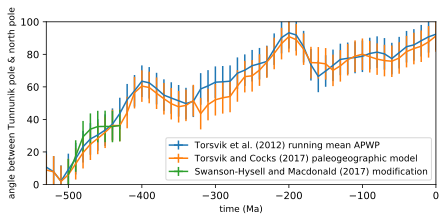

In [73]:
plt.figure(figsize=(7,3))
plt.errorbar(time_T2012, angle_T2012, xerr=0, yerr=9.7,label='Torsvik et al. (2012) running mean APWP')
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[3:11], angle_SH2017[3:11], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) modification')
plt.ylim(0,100)
plt.xlim(-530,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=9)
plt.xlabel('time (Ma)',fontsize=9)
plt.legend(loc=4,fontsize=9)
plt.show()

### Secular variation represented by a Fisher distribution

The chance of such an angular deviation from the geographic pole arising through secular variation can be determined through comparison to secular variation models. Two approaches are taken below. The first is to model secular variation as coming from a Fisher distribution with a kappa of 20. The second is to model secular variation using the TK03 model. As the angle between the impact virtual geomagnetic pole and the position of geographic north implied by the models and the running mean APWP gets larger the chance of the VGP position having arisen through secular variation of the geomagnetic field becomes lower. To evaluate the chance that 


The percentage of simulated draws coming from those models that are within the angle and A95 uncertainty bounds at each time step can then be calculated and used to assess the likelihood that the crater is a given age.

In [74]:
fishrot_lon,fishrot_lat = ipmag.fishrot(k=20, n=100000, dec=0, inc=90, di_block=False)
fishrot_angle = []
for n in range(0,len(fishrot_lon)):
    vgp = (fishrot_lon[n],fishrot_lat[n])
    angle = pmag.angle(vgp,(0,90))
    fishrot_angle.append(angle[0])

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


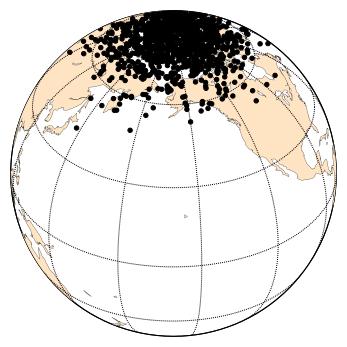

In [75]:
mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon=fishrot_lon[:1000],vgp_lat=fishrot_lat[:1000])
plt.show()

In [76]:
percentages_fish_TC2017 = []

for n in range(0,len(angle_TC2017)):
    angle_min = angle_TC2017[n]-9.7
    angles = []
    for n in range(len(fishrot_angle)):
        if fishrot_angle[n] > angle_min:
            angles.append(fishrot_angle[n])
    percent = len(angles)/len(fishrot_angle)*100
    percentages_fish_TC2017.append(percent)
    
percentages_fish_SH2017 = []

for n in range(0,len(angle_SH2017)):
    angle_min = angle_SH2017[n]-9.7
    angles = []
    for n in range(len(fishrot_angle)):
        if fishrot_angle[n] > angle_min:
            angles.append(fishrot_angle[n])
    percent = len(angles)/len(fishrot_angle)*100
    percentages_fish_SH2017.append(percent)
    
percentages_fish_T2012APWP = []

for n in range(0,len(angle_T2012)):
    angle_min = angle_T2012[n]-9.7
    angles = []
    for n in range(len(fishrot_angle)):
        if fishrot_angle[n] > angle_min:
            angles.append(fishrot_angle[n])
    percent = len(angles)/len(fishrot_angle)*100
    percentages_fish_T2012APWP.append(percent)

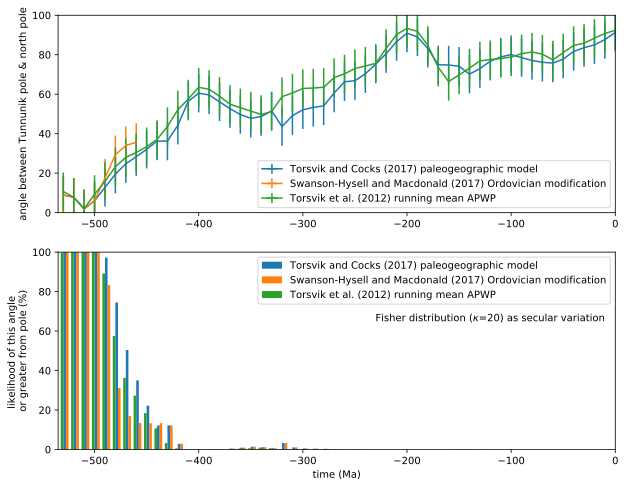

In [77]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,
             label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,
             label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.errorbar(time_T2012, angle_T2012, xerr=0, yerr=9.7,
             label='Torsvik et al. (2012) running mean APWP')
plt.ylim(0,100)
plt.xlim(-535,0)
plt.ylabel('angle between Tunnunik pole & north pole')
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of this angle \nor greater from pole (%)')
plt.xlabel('time (Ma)')


time_TC2017_shifted = []
shift = 2.5
for n in range(0,len(time_TC2017)):
    shifted_time = time_TC2017[n]
    time_TC2017_shifted.append(shifted_time)

time_SH2017_shifted = []
for n in range(0,len(time_SH2017)):
    shifted_time = time_SH2017[n] + shift
    time_SH2017_shifted.append(shifted_time)
    
time_T2012_shifted = []
for n in range(0,len(time_T2012)):
    shifted_time = time_T2012[n] - shift
    time_T2012_shifted.append(shifted_time)
    
plt.bar(time_TC2017_shifted,percentages_fish_TC2017,width=shift,align='edge',linewidth=0,
        label='Torsvik and Cocks (2017) paleogeographic model')
plt.bar(time_SH2017_shifted,percentages_fish_SH2017,width=shift,align='edge',linewidth=0,
        label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.bar(time_T2012_shifted,percentages_fish_T2012APWP,width=shift,align='edge',linewidth=0,
        label='Torsvik et al. (2012) running mean APWP')
plt.text(-10,65,'Fisher distribution ($\kappa$=20) as secular variation',
         horizontalalignment='right')
plt.legend(loc=1,fontsize=10)
plt.xlim(-535,0)
plt.ylim(0,100)
plt.savefig('Tunnunik_VGP_analysis_Fisher.pdf')
plt.savefig('Tunnunik_VGP_analysis_Fisher.png')
plt.show()

### Secular variation represented by the TK03.GAD model

We will define a function that draws random samples from the TK03 secular variation model at specified locations.

In [78]:
import random

def tk03_vgp_calc(N=10,lat=0,lon=0,dec=0,R=0,G2=0.,G3=0.,Imax = 0):
    """
    specify N, default is 100
    D specify mean Dec, default is 0
    LAT specify latitude, default is 0
    lon specify latitude, default is 0
    R include reversals (0 no reversals, 1 reversals)
    G2 FRAC  specify average g_2^0 fraction (default is 0)
    G3 FRAC  specify average g_3^0 fraction (default is 0)
    Imax  truncates  intensities to >Imax uT (default is 0)
    """
    vectors = []
    declinations = []
    inclinations = []
    tk03_vgp_lon = []
    tk03_vgp_lat = []
    for k in range(N):
        gh = pmag.mktk03(8, k, G2, G3)  # terms and random seed
        # get a random longitude, between 0 and 359
        #lon = random.randint(0, 360)
        vec = pmag.getvec(gh, lat, lon)  # send field model and lat to getvec
        if vec[2] >= Imax:
            vec[0] += dec
            if k % 2 == 0 and R == 1:
                vec[0] += 180.
                vec[1] = -vec[1]
            if vec[0] >= 360.:
                vec[0] -= 360.
        vectors.append(vec)
        declinations.append(vec[0])
        inclinations.append(vec[1])
        vgp = pmag.dia_vgp(vec[0],vec[1],0,lat,lon)
        tk03_vgp_lon.append(vgp[0])
        tk03_vgp_lat.append(vgp[1])
    return tk03_vgp_lon, tk03_vgp_lat

To get a sense of the scatter associated with the model, we can draw samples from a location and calculate the angle of each of these samples from geographic north.

In [79]:
tk03_vgp_lon, tk03_vgp_lat = tk03_vgp_calc(N=100000,lat=60,lon=0)
TK03_angle = []
for n in range(0,len(tk03_vgp_lon)):
    vgp = (tk03_vgp_lon[n],tk03_vgp_lat[n])
    angle = pmag.angle(vgp,(0,90))
    TK03_angle.append(angle[0])

In [80]:
print(np.percentile(TK03_angle,90))
print(np.percentile(TK03_angle,95))

33.19313820143466
41.63355778011122


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


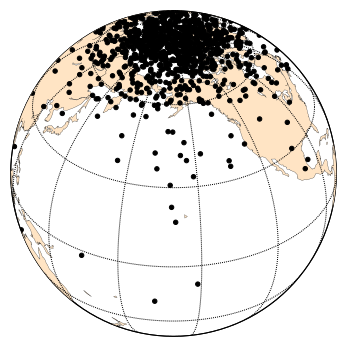

In [81]:
mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon=tk03_vgp_lon[:1000],vgp_lat=tk03_vgp_lat[:1000])
plt.show()

The scatter resulting from the TK03 model is dependent on the latitude of the site. We will use the position of the crater implied by the paleogeographic models and develop draws from the TK03 model at this position in 10 million year increments. 

GPlates was used to calculate the position of the Tunnunik impact crater through time predicted by the Torsvik and Cocks (2017) paleogeographic model and the Swanson-Hysell and Macdonald (2017) modification of it. The location of the impact crater is: 72.46,-113.90

In [83]:
Tunnunik_location_SH2017 = pd.read_csv('../Data/Tunnunik_location_SH2017.csv')
Tunnunik_location_TC2017 = pd.read_csv('../Data/Tunnunik_location_TC2017.csv')
Tunnunik_location_TC2017.head()

Time (Ma)     Lat       Lon  V mag (cm/yr)  V azimuth  V colat (cm/yr)  \
0        530  0.1085 -136.7387         3.7105   109.4646           1.2364   
1        520 -0.9569 -133.5803         7.2309   290.8948          -2.5789   
2        510  1.0383 -139.7592         8.5156    65.1488          -3.5788   
3        500  4.6487 -133.0109        10.3424   298.6114          -4.9526   
4        490  8.7035 -141.4265         4.8235    39.9128          -3.6997   

   V lon (cm/yr)  Ang V (�/Ma)  
0         3.4984        0.3711  
1        -6.7554        0.8858  
2         7.7270        1.0311  
3        -9.0794        1.0353  
4         3.0948        0.7764

In [84]:
percentages_TK03_TC2017 = []
percentages_TK03_SH2017 = []
percentages_TK03_T2012 = []

for n in range(0,len(Tunnunik_location_TC2017)):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=10000,lat=Tunnunik_location_TC2017.Lat[n],lon=Tunnunik_location_TC2017.Lon[n])

    tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_TC2017[n]-9.7
    angles = []
    for a in range(len(tk03_angle)):
        if tk03_angle[a] > angle_min:
            angles.append(tk03_angle[a])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_TC2017.append(percent)
    
    angle_min = angle_SH2017[n]-9.7
    angles = []
    for a in range(len(tk03_angle)):
        if tk03_angle[a] > angle_min:
            angles.append(tk03_angle[a])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_SH2017.append(percent)
    
    angle_min = np.flip(angle_T2012,0)[n]-9.7
    angles = []
    for a in range(len(tk03_angle)):
        if tk03_angle[a] > angle_min:
            angles.append(tk03_angle[a])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_T2012.append(percent)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


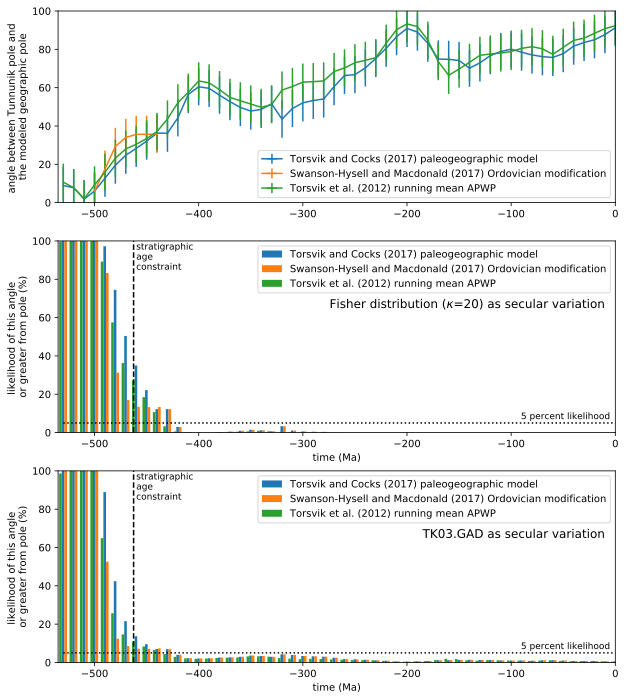

In [85]:
plt.figure(figsize=(10,12))
plt.subplot(311)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,
             label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[3:10], angle_SH2017[3:10], xerr=0, yerr=9.7,
             label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.errorbar(time_T2012, angle_T2012, xerr=0, yerr=9.7,
             label='Torsvik et al. (2012) running mean APWP')
plt.ylim(0,100)
plt.xlim(-535,0)
plt.ylabel('angle between Tunnunik pole and \nthe modeled geographic pole')
plt.legend(loc=4,fontsize=10)

plt.subplot(312)
plt.ylabel('likelihood of this angle \nor greater from pole (%)')
plt.xlabel('time (Ma)')

time_TC2017_shifted = []
shift = 2.5
for n in range(0,len(time_TC2017)):
    shifted_time = time_TC2017[n] - 1.5
    time_TC2017_shifted.append(shifted_time)

time_SH2017_shifted = []
for n in range(0,len(time_SH2017)):
    shifted_time = time_SH2017[n] + shift - 1.5
    time_SH2017_shifted.append(shifted_time)
    
time_T2012_shifted = []
for n in range(0,len(time_T2012)):
    shifted_time = np.flip(time_T2012,0)[n] - shift - 1.5
    time_T2012_shifted.append(shifted_time)
    
plt.bar(time_TC2017_shifted,percentages_fish_TC2017,width=shift,align='edge',linewidth=0,
        label='Torsvik and Cocks (2017) paleogeographic model')
plt.bar(time_SH2017_shifted,percentages_fish_SH2017,width=shift,align='edge',linewidth=0,
        label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.bar(time_T2012_shifted,np.flip(percentages_fish_T2012APWP,0),width=shift,align='edge',linewidth=0,
        label='Torsvik et al. (2012) running mean APWP')
plt.text(-10,65,'Fisher distribution ($\kappa$=20) as secular variation',
         horizontalalignment='right',fontsize=12)
plt.xlim(-535,0)
plt.legend(loc=1,fontsize=10)
plt.ylim(0,100)
plt.hlines(5,-530,0,linestyles='dotted')
plt.vlines(-462.5,0,100,linestyles='dashed')
plt.text(-460,85,'stratigraphic\nage\nconstraint',horizontalalignment='left',fontsize=9)
plt.text(-5,7,'5 percent likelihood',horizontalalignment='right',fontsize=9)

plt.subplot(313)
plt.ylabel('likelihood of this angle \nor greater from pole (%)')
plt.xlabel('time (Ma)')
    
plt.bar(time_TC2017_shifted,percentages_TK03_TC2017,width=shift,align='edge',linewidth=0,
        label='Torsvik and Cocks (2017) paleogeographic model')
plt.bar(time_SH2017_shifted,percentages_TK03_SH2017,width=shift,align='edge',linewidth=0,
        label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.bar(time_T2012_shifted,percentages_TK03_T2012,width=shift,align='edge',linewidth=0,
        label='Torsvik et al. (2012) running mean APWP')
plt.text(-10,65,'TK03.GAD as secular variation',horizontalalignment='right',fontsize=12)
plt.legend(loc=1,fontsize=10)
plt.xlim(-535,0)
plt.ylim(0,100)
plt.hlines(5,-530,0,linestyles='dotted')
plt.vlines(-462.5,0,100,linestyles='dashed')
plt.text(-460,85,'stratigraphic\nage\nconstraint',horizontalalignment='left',fontsize=9)
plt.text(-5,7,'5 percent likelihood',horizontalalignment='right',fontsize=9)

plt.savefig('Tunnunik_VGP_analysis.pdf')
plt.savefig('Tunnunik_VGP_analysis.png')
plt.show()

In [86]:
likelihood_TC2017 = pd.DataFrame({'time': time_TC2017,'percentage':percentages_TK03_TC2017})
likelihood_TC2017

percentage  time
0       100.00  -530
1       100.00  -520
2       100.00  -510
3       100.00  -500
4        88.94  -490
5        42.40  -480
6        21.53  -470
7        13.68  -460
8         9.52  -450
9         7.01  -440
10        6.92  -430
11        3.95  -420
12        2.23  -410
13        2.09  -400
14        2.20  -390
15        2.55  -380
16        2.67  -370
17        2.94  -360
18        3.61  -350
19        3.37  -340
20        2.96  -330
21        4.22  -320
22        3.90  -310
23        3.36  -300
24        3.20  -290
25        3.02  -280
26        2.47  -270
27        1.73  -260
28        1.62  -250
29        1.41  -240
30        1.15  -230
31        0.90  -220
32        0.54  -210
33        0.49  -200
34        0.62  -190
35        0.74  -180
36        1.17  -170
37        1.22  -160
38        1.34  -150
39        1.37  -140
40        1.30  -130
41        1.27  -120
42        1.08  -110
43        1.00  -100
44        1.05   -90
45        0.90   -80
46        1.15   -70
47        1.20   -60
48        1.00   -50
49        0.78   -40
50        0.77   -30
51        0.75   -20
52        0.60   -10
53        0.56     0

In [ ]:
    
percentages_TK03_SH2017 = []

for n in range(0,len(Tunnunik_location_SH2017)):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=10000,lat=Tunnunik_location_SH2017.Lat[n],lon=Tunnunik_location_SH2017.Lon[n])

    tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_SH2017[n]-9.7
    angle_max = angle_SH2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_SH2017.append(percent)

In [73]:
percentages_TK03_TC2017 = []
percentages_TK03_SH2017 = []
percentages_TK03_T2012APWP = []

for n in range(0,len(Tunnunik_location_SH2017)):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=1000,lat=Tunnunik_location_SH2017.Lat[n],
                                                lon=Tunnunik_location_SH2017.Lon[n])

    tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_SH2017[n]-9.7

        for n in range(len(tk03_angle)):
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        
    angle_min = angle_TC2017[n]-9.7
#     for n in range(len(tk03_angle)):
#         angles = []
#         for n in range(len(tk03_angle)):
#             if tk03_angle[n] > angle_min:
#                 angles.append(tk03_angle[n])
#         percent = len(angles)/len(tk03_angle)*100
#         percentages_TK03_TC2017.append(percent)
        
#     percentages_TK03_T2012APWP = []

#     for n in range(0,len(angle_T2012)):
#         angle_min = angle_T2012[n]-9.7
#         angles = []
#         for n in range(len(tk03_angle)):
#             if tk03_angle[n] > angle_min:
#                 angles.append(tk03_angle[n])
#         percent = len(angles)/len(tk03_angle)*100
#         percentages_TK03_T2012APWP.append(percent)

0


IndexError: list index out of range

In [76]:
len(Tunnunik_location_SH2017)

54

In [75]:
angle_TC2017[1]

4.8196999999999832

In [50]:
percentages_TK03_TC2017 = []

for n in range(0,len(angle_TC2017)):
    angle_min = angle_TC2017[n]-9.7
    angles = []
    for n in range(len(TK03_angle)):
        if TK03_angle[n] > angle_min:
            angles.append(TK03_angle[n])
    percent = len(angles)/len(TK03_angle)*100
    percentages_TK03_TC2017.append(percent)
    
percentages_TK03_SH2017 = []

for n in range(0,len(angle_SH2017)):
    angle_min = angle_SH2017[n]-9.7
    angles = []
    for n in range(len(TK03_angle)):
        if TK03_angle[n] > angle_min:
            angles.append(TK03_angle[n])
    percent = len(angles)/len(TK03_angle)*100
    percentages_TK03_SH2017.append(percent)
    
percentages_TK03_T2012APWP = []

for n in range(0,len(angle_T2012)):
    angle_min = angle_T2012[n]-9.7
    angles = []
    for n in range(len(TK03_angle)):
        if TK03_angle[n] > angle_min:
            angles.append(TK03_angle[n])
    percent = len(angles)/len(TK03_angle)*100
    percentages_TK03_T2012APWP.append(percent)

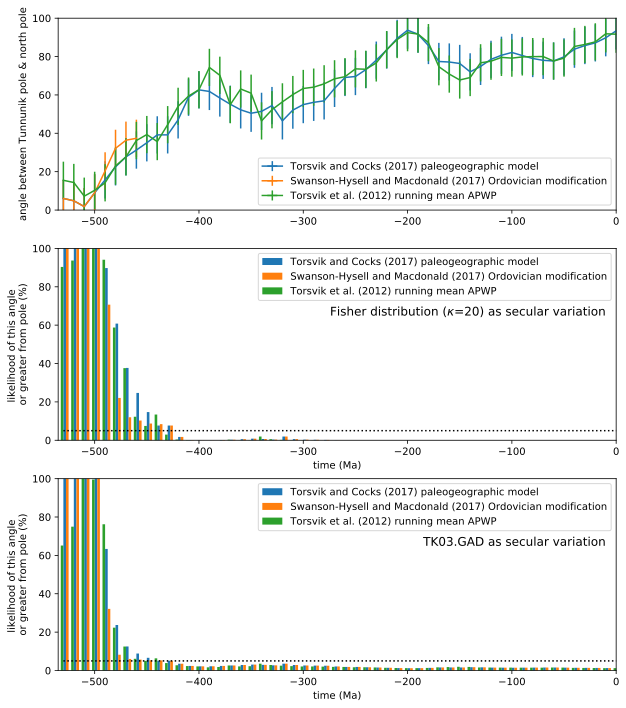

In [74]:


tk03_angle = []
for n in range(0,len(tk03_vgp_lon)):
    vgp = (tk03_vgp_lon[n],tk03_vgp_lat[n])
    angle = pmag.angle(vgp,(0,90))
    tk03_angle.append(angle[0])

percentages_TK03_TC2017 = []
for n in range(0,len(angle_TC2017)):
    angle_min = angle_TC2017[n]-9.7
    angle_max = angle_TC2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_TC2017.append(percent)
    
percentages_TK03_SH2017 = []
for n in range(0,len(angle_SH2017)):
    angle_min = angle_SH2017[n]-9.7
    angle_max = angle_SH2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_SH2017.append(percent)

Here is a visualization of 1000 draws from the TK03 model

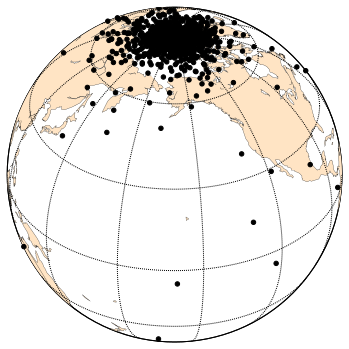

In [75]:
mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon=tk03_vgp_lon[:1000],vgp_lat=tk03_vgp_lat[:1000])

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.ylim(0,100)
plt.xlim(-505,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=10)
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of geomagnetic pole at this angle \n or closer to the geographic pole (%)',fontsize=10)
plt.xlabel('time (Ma)',fontsize=10)
plt.bar(time_TC2017,percentages_TK03_TC2017,width=5,color='b')
plt.bar(time_SH2017,percentages_TK03_SH2017,width=5,color='g')
plt.text(-10,92,'TK03 secular variation model',horizontalalignment='right')
plt.xlim(-505,0)
plt.ylim(0,100)
plt.show()

Time (Ma)      Lat       Lon  V mag (cm/yr)  V azimuth  V colat (cm/yr)  \
0        500   4.6487 -133.0109        10.3424   298.6114          -4.9526   
1        490   8.7035 -141.4265         4.8235    39.9128          -3.6997   
2        480  12.1660 -138.7811         3.7313   298.2675          -1.7671   
3        470  13.6177 -141.8797         9.0167   273.5636          -0.5604   
4        460  13.8478 -150.2147         1.0184   118.6777           0.4887   

   V lon (cm/yr)   Ang V  
0        -9.0794  1.0353  
1         3.0948  0.7764  
2        -3.2864  0.5624  
3        -8.9992 -0.8318  
4         0.8935  0.4556

In [ ]:
percentages_TK03_TC2017_new = []

for n in range(0,8):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=10000,lat=Tunnunik_location_TC2017.Lat[n],lon=Tunnunik_location_TC2017.Lon[n])

    tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_TC2017[n]-9.7
    angle_max = angle_TC2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_TC2017_new.append(percent)
    
percentages_TK03_SH2017_new = []

for n in range(0,len(Tunnunik_location_SH2017)):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=10000,lat=Tunnunik_location_SH2017.Lat[n],lon=Tunnunik_location_SH2017.Lon[n])

    tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_SH2017[n]-9.7
    angle_max = angle_SH2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_SH2017_new.append(percent)

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


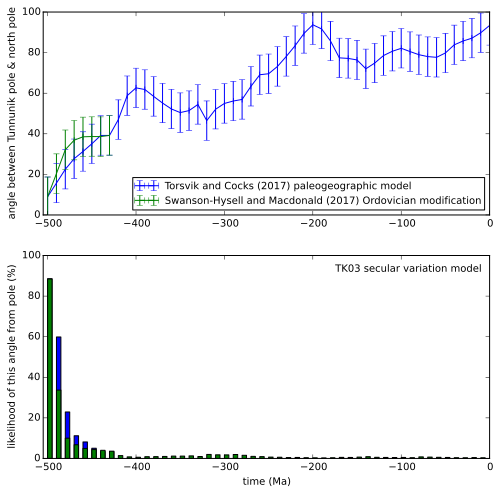

In [111]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.ylim(0,100)
plt.xlim(-505,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=10)
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of this angle from pole (%)',fontsize=10)
plt.xlabel('time (Ma)',fontsize=10)
plt.bar(time_TC2017[0:8],percentages_TK03_TC2017_new[0:8],width=5,color='b')
plt.bar(time_SH2017,percentages_TK03_SH2017_new,width=5,color='g')
plt.text(-10,92,'TK03 secular variation model',horizontalalignment='right')
plt.xlim(-505,0)
plt.ylim(0,100)
plt.savefig('Tunnunik_VGP_analysis_TK03.pdf')
plt.savefig('Tunnunik_VGP_analysis_TK03.png')
plt.show()

In [135]:
time_TC2017[3]
angle_TC2017[3]+9.7
percentages_TK03_TC2017_new[3]

11.17

In [30]:
pmag.dotilt?

Signature: pmag.dotilt(dec, inc, bed_az, bed_dip)
Docstring:
Does a tilt correction on a direction (dec,inc) using bedding dip direction
and bedding dip.

Parameters
----------
dec : declination directions in degrees
inc : inclination direction in degrees
bed_az : bedding dip direction
bed_dip : bedding dip

Returns
-------
dec,inc : a tuple of rotated dec, inc values

Examples
-------
>>> pmag.dotilt(91.2,43.1,90.0,20.0)
(90.952568837153436, 23.103411670066617)
File:      ~/PmagPy/pmagpy/pmag.py
Type:      function


In [70]:
tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=100000,lat=Tunnunik_location_TC2017.Lat[n],lon=Tunnunik_location_TC2017.Lon[n])
within_A95 = []
for x in range(0,len(tk03_vgp_lon)):
    if tk03_vgp_lat[x] > (90 - 9.7):
        within_A95.append(tk03_vgp_lat[x])
length_for_normalization = len(within_A95)
length_for_normalization

57292

In [77]:
percentages_TK03_TC2017_A95 = []
percentages_TK03_TC2017_A95_normalized = []

for n in range(0,8):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=100000,lat=Tunnunik_location_TC2017.Lat[n],lon=Tunnunik_location_TC2017.Lon[n])
    
    tk03_vgp_lon_rot = []
    tk03_vgp_lat_rot = []
    within_A95 = []
    for x in range(0,len(tk03_vgp_lon)):
        rotated = pmag.dotilt(tk03_vgp_lon[x],tk03_vgp_lat[x],
                              Tunnunik_pole_TC2017['Lon'][n],90+Tunnunik_pole_TC2017['Lat'][n])
        tk03_vgp_lon_rot.append(rotated[0])
        tk03_vgp_lat_rot.append(rotated[1])
        if tk03_vgp_lat_rot[x] > (90 -9.7):
            within_A95.append(rotated[1])
    percent = len(within_A95)/len(tk03_vgp_lon)*100
    percent_normalize = len(within_A95)/length_for_normalization*100
    percentages_TK03_TC2017_A95.append(percent)
    percentages_TK03_TC2017_A95_normalized.append(percent_normalize)

percentages_TK03_SH2017_A95 = []
percentages_TK03_SH2017_A95_normalized = []

for n in range(0,len(Tunnunik_location_SH2017)):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=100000,lat=Tunnunik_location_SH2017.Lat[n],lon=Tunnunik_location_SH2017.Lon[n])
    
    tk03_vgp_lon_rot = []
    tk03_vgp_lat_rot = []
    within_A95 = []
    for x in range(0,len(tk03_vgp_lon)):
        rotated = pmag.dotilt(tk03_vgp_lon[x],tk03_vgp_lat[x],
                              Tunnunik_pole_SH2017['Lon'][n],90+Tunnunik_pole_SH2017['Lat'][n])
        tk03_vgp_lon_rot.append(rotated[0])
        tk03_vgp_lat_rot.append(rotated[1])
        if tk03_vgp_lat_rot[x] > (90 -9.7):
            within_A95.append(rotated[1])
    percent = len(within_A95)/len(tk03_vgp_lon)*100
    percent_normalize = len(within_A95)/length_for_normalization*100
    percentages_TK03_SH2017_A95.append(percent)
    percentages_TK03_SH2017_A95_normalized.append(percent_normalize)
             
percentages_TK03_TC2017_A95

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


[36.083999999999996,
 10.999,
 3.225,
 1.4569999999999999,
 0.845,
 0.5479999999999999,
 0.269,
 0.348]

In [78]:
percentages_TK03_SH2017_A95_normalized

[62.88661593241639,
 8.425260071214131,
 1.7367171681910214,
 1.0367939677441877,
 0.9023947497032744,
 0.769740976052503,
 0.7051595336172589,
 0.562033093625637,
 0.2024715492564407,
 0.10298121901836207,
 0.07854499755637785,
 0.07156321999581093,
 0.08378133072680305,
 0.08901766389722823,
 0.12567199609020457,
 0.12392655170006284,
 0.1343992180409132,
 0.12567199609020457,
 0.265307547301543,
 0.2548348809606926,
 0.19898066047615723,
 0.1902534385254486,
 0.1501082175521888,
 0.1396355512113384,
 0.09425399706765342,
 0.06283599804510229,
 0.06458144243524401,
 0.04712699853382671,
 0.03839977658311806,
 0.02618166585212595,
 0.01919988829155903,
 0.00872722195070865,
 0.040145220973259794,
 0.05410877609439363,
 0.04363610975354325,
 0.03839977658311806,
 0.04712699853382671,
 0.048872442923968445,
 0.04363610975354325,
 0.036654332192976334,
 0.040145220973259794,
 0.04363610975354325,
 0.04363610975354325,
 0.0523633317042519,
 0.055854220484535366,
 0.041890665363401525,
 0.

Should perhaps normalize it by the likelihood of a VGP within same confidence interval centered on the pole.

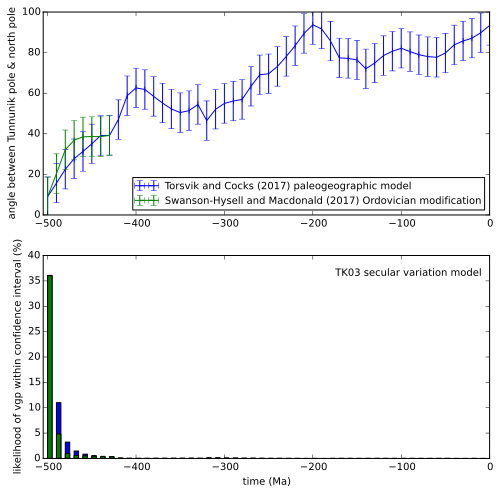

In [79]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.ylim(0,100)
plt.xlim(-505,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=10)
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of vgp within confidence interval (%)',fontsize=10)
plt.xlabel('time (Ma)',fontsize=10)
plt.bar(time_TC2017[0:8],percentages_TK03_TC2017_A95[0:8],width=5,color='b')
plt.bar(time_SH2017,percentages_TK03_SH2017_A95,width=5,color='g')
plt.text(-10,36,'TK03 secular variation model',horizontalalignment='right')
plt.xlim(-505,0)
#plt.ylim(0,100)
plt.savefig('Tunnunik_VGP_analysis_TK03_A95.pdf')
plt.savefig('Tunnunik_VGP_analysis_TK03_A95.png')
plt.show()

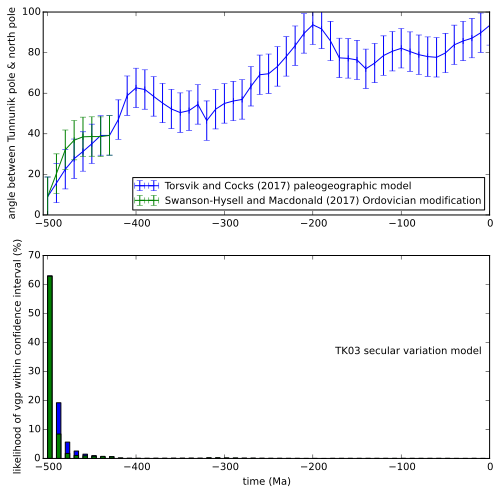

In [80]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.ylim(0,100)
plt.xlim(-505,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=10)
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of vgp within confidence interval (%)',fontsize=10)
plt.xlabel('time (Ma)',fontsize=10)
plt.bar(time_TC2017[0:8],percentages_TK03_TC2017_A95_normalized[0:8],width=5,color='b')
plt.bar(time_SH2017,percentages_TK03_SH2017_A95_normalized,width=5,color='g')
plt.text(-10,36,'TK03 secular variation model',horizontalalignment='right')
plt.xlim(-505,0)
#plt.ylim(0,100)
plt.savefig('Tunnunik_VGP_analysis_TK03_A95.pdf')
plt.savefig('Tunnunik_VGP_analysis_TK03_A95.png')
plt.show()

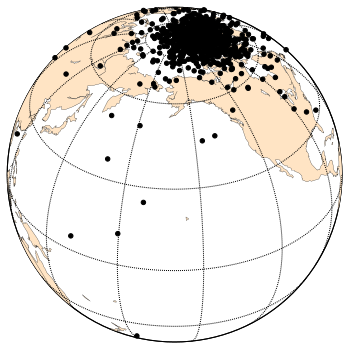

In [46]:
mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon=tk03_vgp_lon_rot[:1000],vgp_lat=tk03_vgp_lat_rot[:1000])

In [42]:
pmag.dotilt(Tunnunik_pole_SH2017['Lon'][0]+180,-Tunnunik_pole_SH2017['Lat'][0],
            Tunnunik_pole_SH2017['Lon'][0],90+Tunnunik_pole_SH2017['Lat'][0])

120.96375653207352

In [ ]:
tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_TC2017[n]-9.7
    angle_max = angle_TC2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_TC2017_new.append(percent)

Fossil information in Dewing et al. 2013:

"It is overlain by thin- to medium- bedded dolowackestone with crinoids, gastropods, stromatoporoids, and silicified solitary rugose corals and tabulate corals belonging to Catenipora and Favosites. These strata are assigned to the Thumb Mountain Formation."